### Problem Definition: Customer Churn Prediction for ConnectTel Telecom Company

ConnectTel Telecom Company is facing a critical challenge related to customer churn, which poses a significant threat to its business sustainability and growth. The current customer retention strategies lack precision and effectiveness, resulting in the loss of valuable customers to competitors. To address this, ConnectTel aims to develop a robust customer churn prediction system.

The problem at hand involves predicting customer churn for ConnectTel, a telecom company, using advanced analytics and machine learning techniques. Customer churn is defined as customers canceling their telecom service. This prediction is essential for ConnectTel to implement targeted retention initiatives and reduce customer attrition.

#### Objectives:
1. Develop a robust machine learning model to accurately forecast customer churn based on historical customer data.
2. Implement targeted retention initiatives for identified high-risk customers.

#### Features:
- Demographic Information:
  - Gender, SeniorCitizen, Partner, Dependents

- Customer Account Details:
  - Tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

#### Target Variable:
- Churn: Indicates whether the customer has churned or not.

#### Stakeholders:
- ConnectTel's management, marketing teams, and customer service.


#### Scope and Limitations:
- The project will focus on historical customer data up to a specific date and won't include real-time data.

#### Measuring Success:
- Success will be measured by the accuracy of the churn prediction model and the subsequent reduction in customer churn rate.

#### Solution Approach:
- Machine learning algorithms, such as logistic regression, decision trees, and ensemble methods, will be employed to predict customer churn.

#### Expected Benefits:
- ConnectTel expects a significant reduction in customer churn, leading to increased revenue and improved customer satisfaction. A successful solution will enable ConnectTel to maintain a competitive edge in the telecommunications industry.

#### Importance:
- Solving this problem is crucial for ConnectTel to remain competitive, enhance customer relations, and ensure sustainable business growth.

### Data Dictionary 

1. CustomerID: A unique identifier assigned to each telecom customer, enabling tracking and identification of individual customers.
2. Gender: The gender of the customer, which can be categorized as male, or female. This information helps in analyzing gender-based trends in customer churn.
3. SeniorCitizen: A binary indicator that identifies whether the customer is a senior citizen or not. This attribute helps in understanding if there are any specific churn patterns among senior customers.
4. Partner: Indicates whether the customer has a partner or not. This attribute helps in evaluating the impact of having a partner on churn behavior.
5. Dependents: Indicates whether the customer has dependents or not. This attribute helps in assessing the influence of having dependents on customer churn.
6. Tenure: The duration for which the customer has been subscribed to the telecom service. It represents the loyalty or longevity of the customer’s relationship with the company and is a significant predictor of churn.
7. PhoneService: Indicates whether the customer has a phone service or not. This attribute helps in understanding the impact of phone service on churn.
8. MultipleLines: Indicates whether the customer has multiple lines or not. This attribute helps in analyzing the effect of having multiple lines on customer churn.
9. InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service. It helps in evaluating the relationship between internet service and churn.
10. OnlineSecurity: Indicates whether the customer has online security services or not. This attribute helps in analyzing the impact of online security on customer churn.
11. OnlineBackup: Indicates whether the customer has online backup services or not. This attribute helps in evaluating the impact of online backup on churn behavior.
12. DeviceProtection: Indicates whether the customer has device protection services or not. This attribute helps in understanding the influence of device protection on churn.
13. TechSupport: Indicates whether the customer has technical support services or not. This attribute helps in assessing the impact of tech support on churn behavior.
14. StreamingTV: Indicates whether the customer has streaming TV services or not. This attribute helps in evaluating the impact of streaming TV on customer churn.
15. StreamingMovies: Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence of streaming movies on churn behavior.
16. Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.
17. PaperlessBilling: Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of paperless billing on customer churn.
18. PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards. This attribute helps in evaluating the impact of payment methods on churn.
19. MonthlyCharges: The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly charges and churn behavior.
20. TotalCharges: The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the customer and may have an impact on churn.
21. Churn: The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to predict in telecom customer churn analysis.

In [1]:
# EDA 

# Import useful libraies
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [2]:
# Load dataset

df = pd.read_csv("/Users/toluwanijacobs/Desktop/Data Science/Case Study/Python/Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Data verification - data type, number of features and rows, missing data, etc

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Convert a Total charges to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# statistical analysis of the data

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# Describe Categorical data

df.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [9]:
# investigate the missing data 

null_vals = df.isnull().sum() 
null_vals

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Observation
From the data info above, only the 'TotalCharges' column has some missing data.

In [10]:
# Checking for data duplicates

df.duplicated().sum()

0

### Observation 

The dataset has no duplicated values 

### Exploratory Data Analysis 

- Visualize relationships between the label and some key features
- Explore correlations
- Conduct univariate, bivariate, and multivariate analysis as much as is feasible


In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# Grouping Tenure into loyality groups

def loyalty_group (x):
    if x <= 12:
        return "NewCust: 0-12 mth"
    elif x <= 24:
        return "EarlyCust: 13-24 mth"
    elif x <= 46:
        return "MidTermCust: 25-48 mth"
    elif x <= 60:
        return "LongTermCust: 49-60 mth"
    else:
        return "EstCust: 60+ mth"

df['loyalty_group'] = df['tenure'].apply(loyalty_group)

In [13]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,loyalty_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NewCust: 0-12 mth
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,MidTermCust: 25-48 mth
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NewCust: 0-12 mth


In [14]:
# Splitting the dataset into numerical features (num_feat) and categorical features(cat_feat) for easy analysis and visualizations

num_feat = df.select_dtypes(include = ['float64', 'int64'])
cat_feat = df.select_dtypes(include = ['object'])

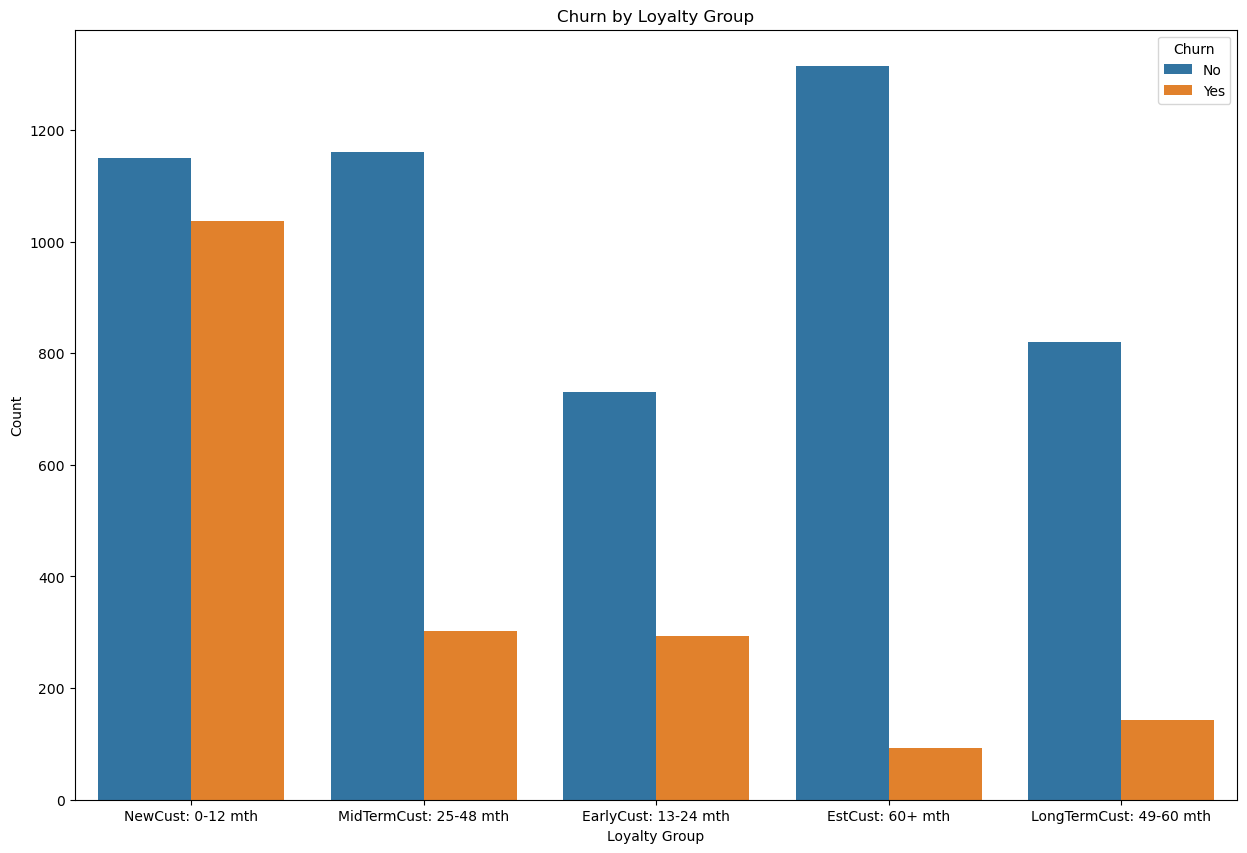

In [15]:
# Visualizing churn based on loyalty group 

plt.figure(figsize=(15, 10))
sb.countplot(x='loyalty_group', hue='Churn', data=df)
plt.title('Churn by Loyalty Group')
plt.xlabel('Loyalty Group')
plt.ylabel('Count')
plt.show()

#### Observation 

* The chart reveals that new custormers that have been with Connecttel between 1 and 12 months churn the most 

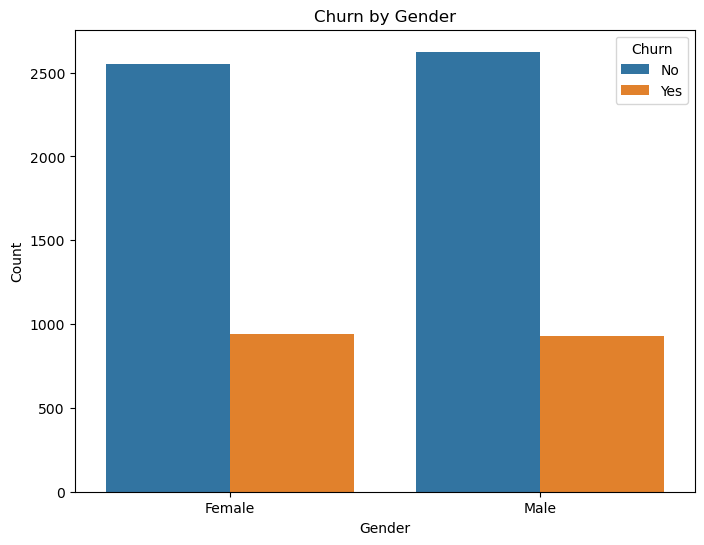

In [16]:
# Visualizing churn based on gender

plt.figure(figsize=(8, 6))
sb.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Observation 

There appears to be a relatively balanced gender distribution with regards to churn in the customer base. Female customers represent a slightly larger portion in terms on churn.

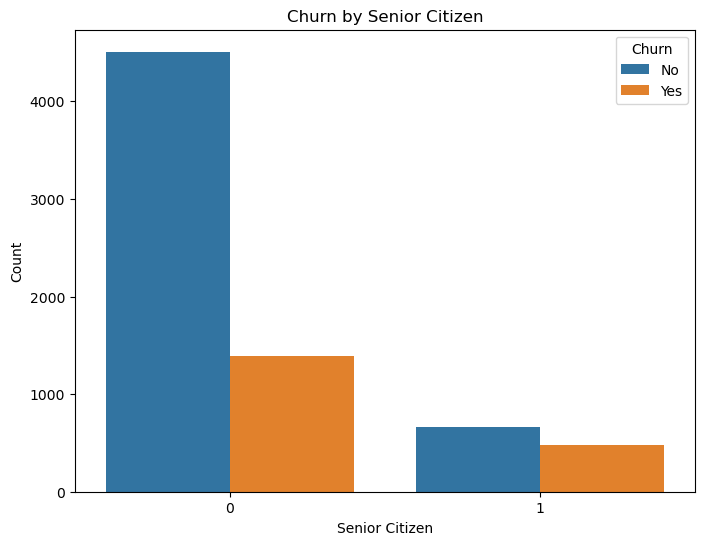

In [17]:
# Visualizing churn based on seniors

plt.figure(figsize=(8, 6))
sb.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

#### Observation 

The chart reveals that senior citizens donot churn as much as other age groups in the company

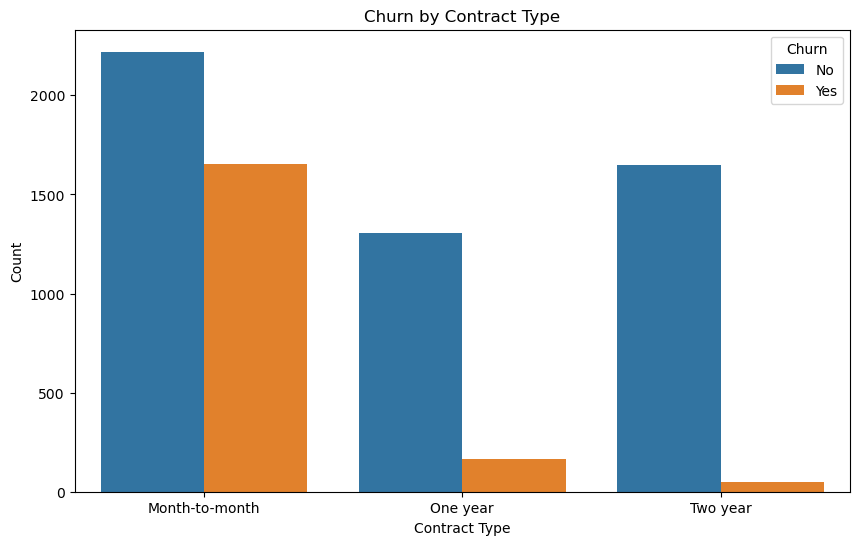

In [18]:
# Visualize churn based on contract type

plt.figure(figsize=(10, 6))
sb.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

#### Observation 

From the bar chat we can see the customers on a month-to-month contract have the highest churn rate

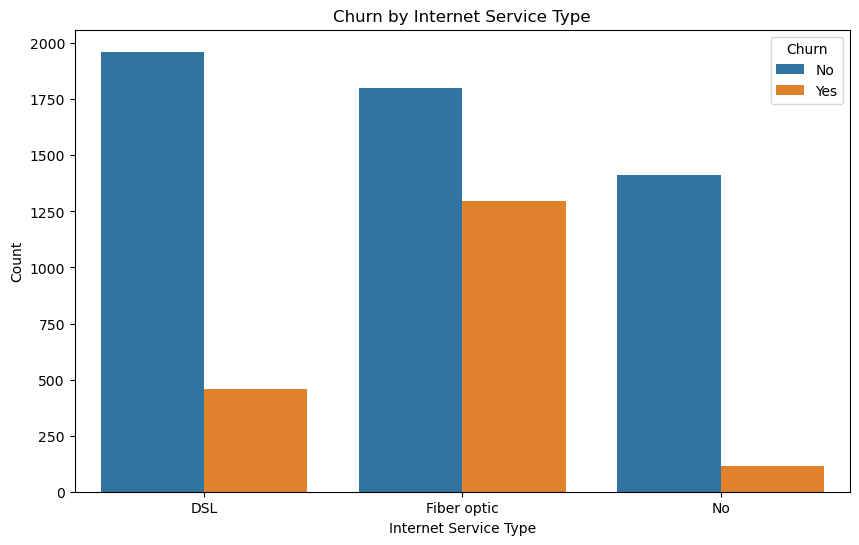

In [19]:
# Visualize churn based on internet service type

plt.figure(figsize=(10, 6))
sb.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

#### Observation

Looking at the internet services provided by Connecttel, Fiber optic have the highest churn rate 


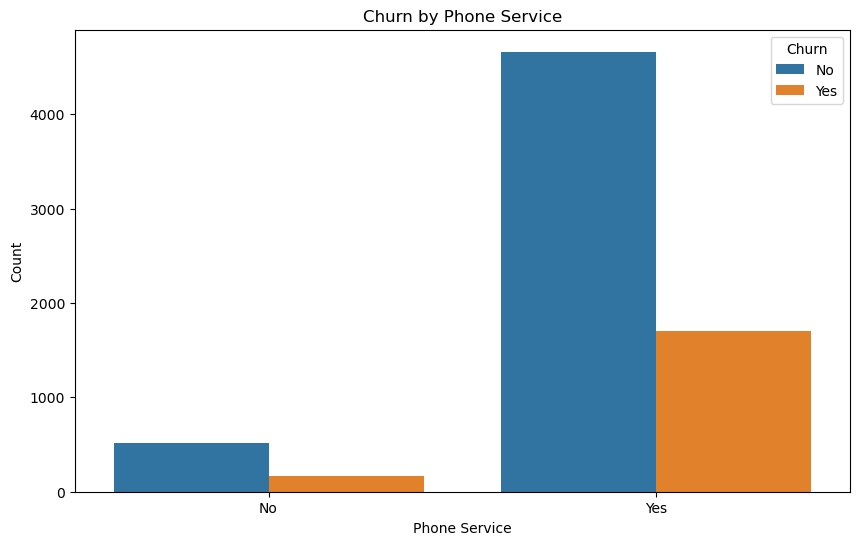

In [20]:
# Visualize churn based on phone service

plt.figure(figsize=(10, 6))
sb.countplot(x='PhoneService', hue='Churn', data=df)
plt.title('Churn by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

#### Observation 

It can be observed that Connecttel customers with phone service have a higher churn rate when comparing to customers without phone service

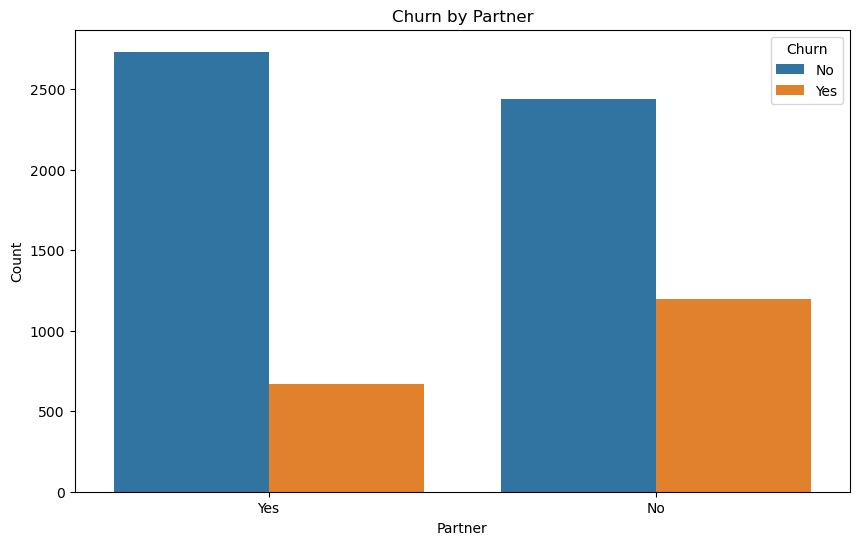

In [21]:
# Visualize churn based on partner

plt.figure(figsize=(10, 6))
sb.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn by Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

#### Observation 

It can be observed that Connecttel customers without partners have higher churn rate compared to customers with a partner

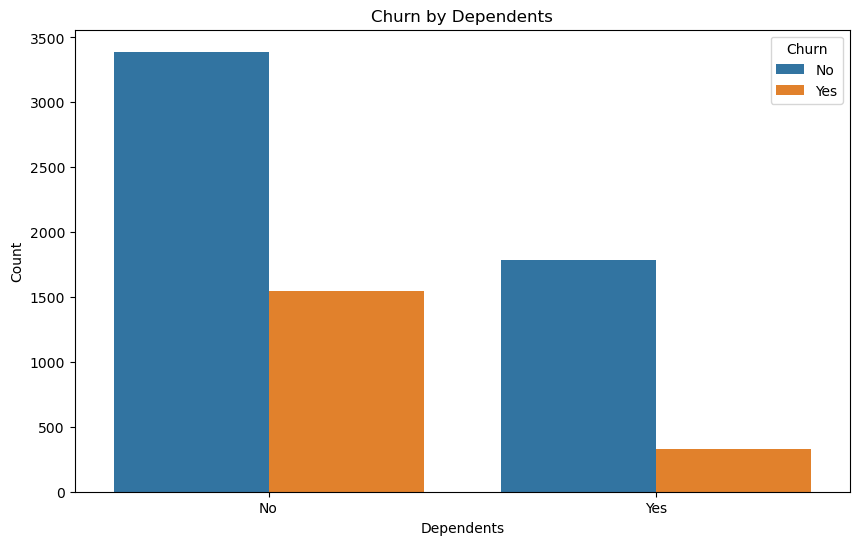

In [22]:
# Visualize churn based on Dependants

plt.figure(figsize=(10, 6))
sb.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

#### Observation 

It can be observed that Connecttel customers without dependents have higher churn rate compared to customers with dependents

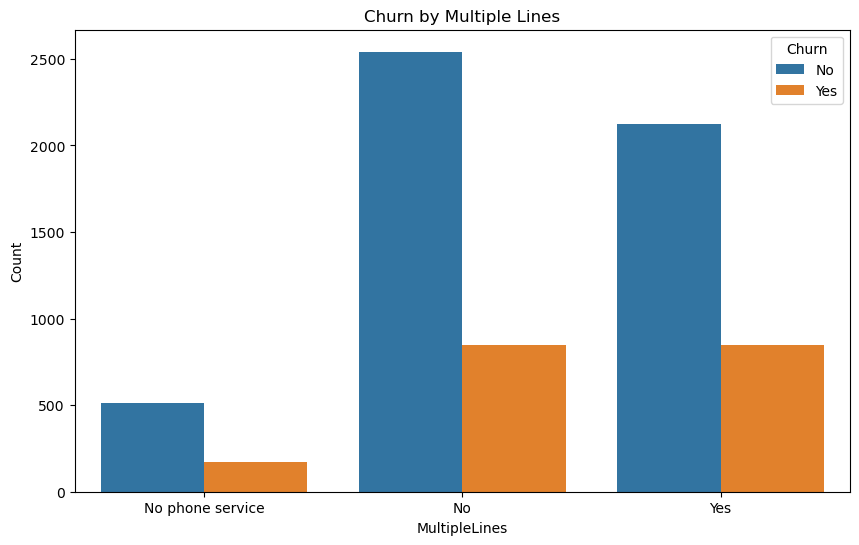

In [23]:
# Visualize churn based on Partner

plt.figure(figsize=(10, 6))
sb.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('Churn by Multiple Lines')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.show()

#### Observation

There appears to be a balanced relationship when considering churn with regards to customers with multiple line 

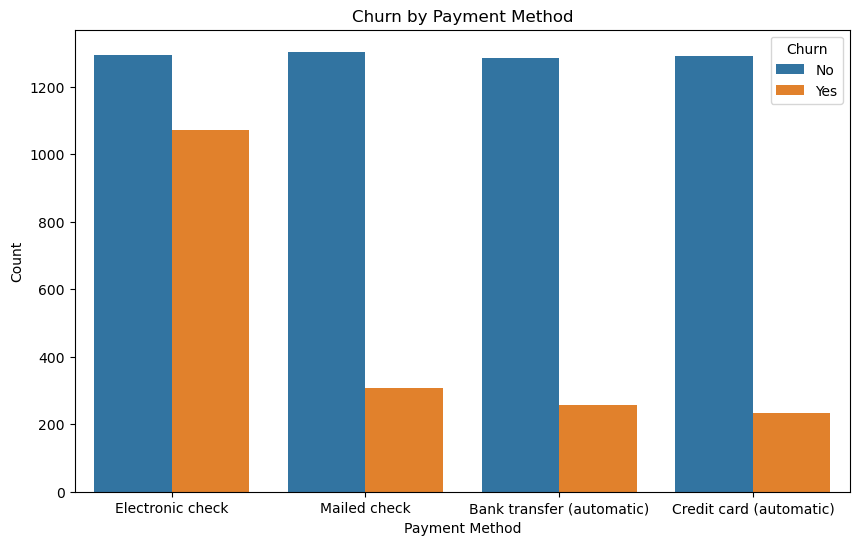

In [24]:
# Visualize churn based on Payment Method

plt.figure(figsize=(10, 6))
sb.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

#### Observation 

From the payment method countplot it can be observed that customers that pay with Electronic check have the highest churn rate.

### Univariate Analysis

In [25]:
cat_feat.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
       'loyalty_group'],
      dtype='object')

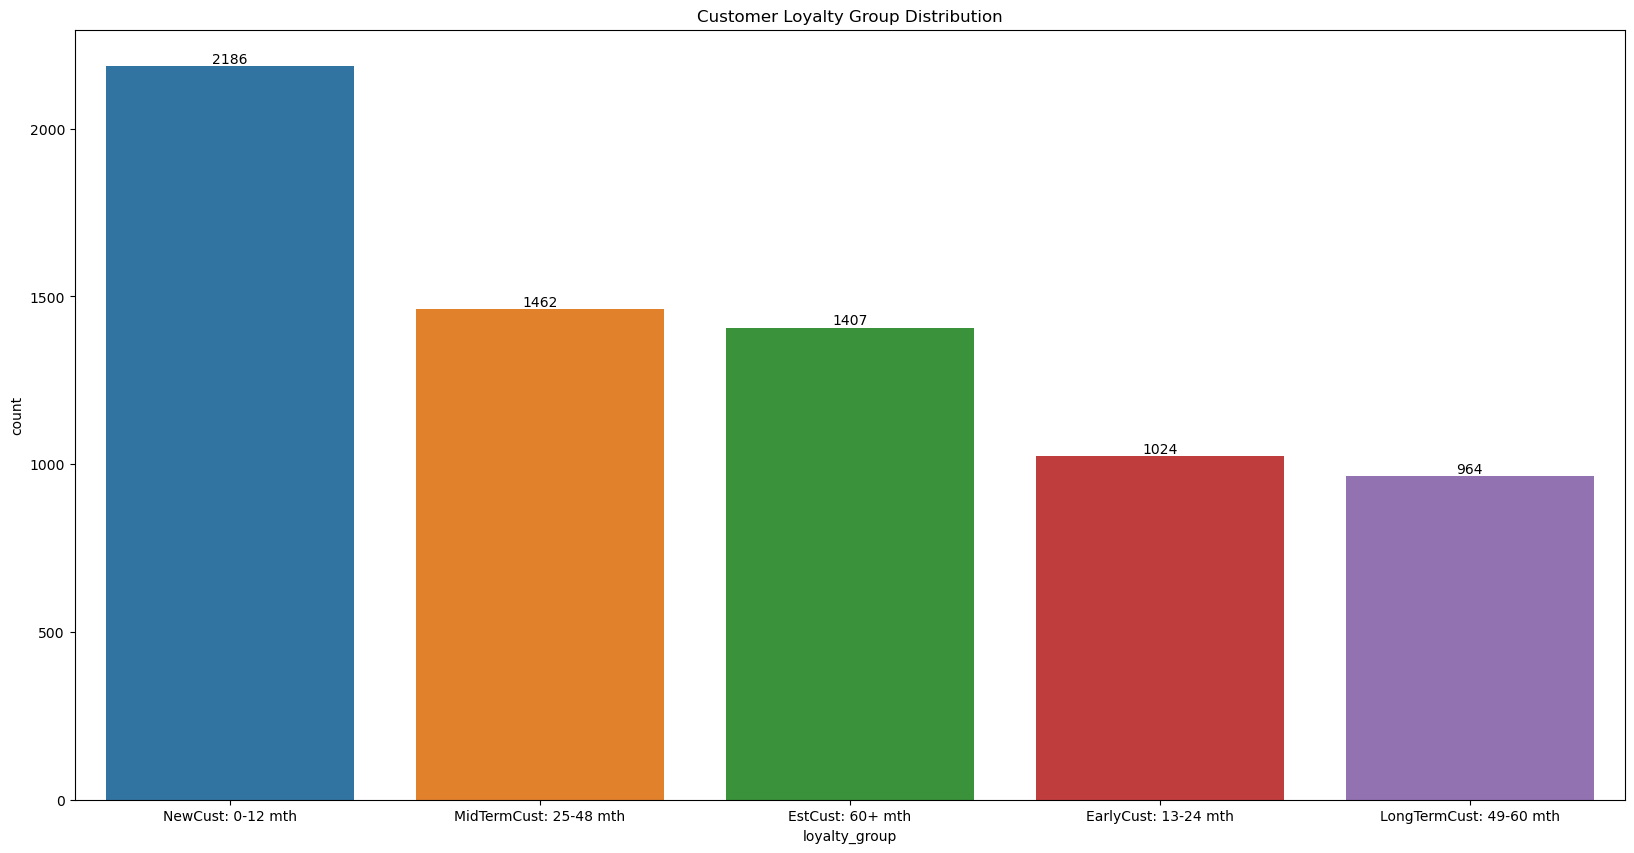

NewCust: 0-12 mth          2186
MidTermCust: 25-48 mth     1462
EstCust: 60+ mth           1407
EarlyCust: 13-24 mth       1024
LongTermCust: 49-60 mth     964
Name: loyalty_group, dtype: int64


In [26]:
# Visualizing the loyalty grouping

plt.figure(figsize = (20,10))
plt.title('Customer Loyalty Group Distribution')

ax = sb.countplot(x=df["loyalty_group"], order = df["loyalty_group"].value_counts(ascending=False).index)
values = df["loyalty_group"]. value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)

plt.show();

print(df["loyalty_group"].value_counts())

#### Observation 

This count plot shows a grouping of customer tenure with Connecttel, we can observe that the customers that have been with them for 12 months or less have the highest number.

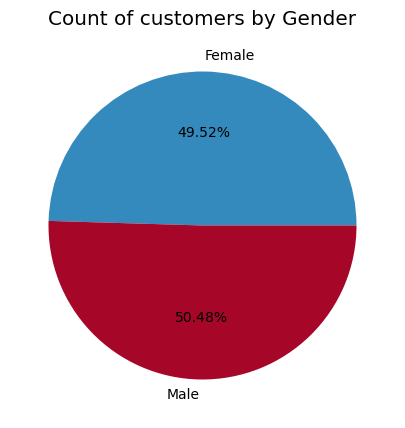

In [27]:
# Total number of customers by Gender

plt.style.use('bmh')
fig, ax = plt.subplots(figsize = (8,5))
plt.title('Count of customers by Gender')
count = Counter(df['gender'])
ax.pie(count.values(), labels = count.keys(), autopct = lambda p: f'{p:.2f}%');

#### Observation 

The pie chart shows a relatively balanced gender distribution among the customer base. Male customers represent a slightly larger portion of the customer base compared to female customers.

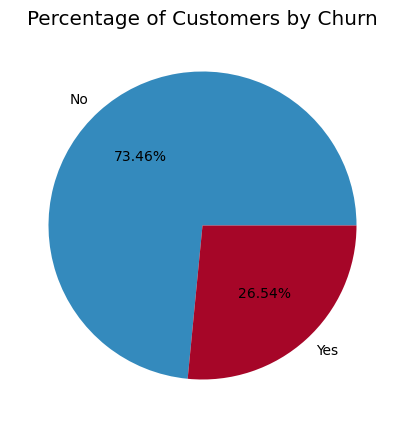

In [28]:
# Total number of customers by Churn

plt.style.use('bmh')
fig, ax = plt.subplots(figsize = (8,5))
plt.title('Percentage of Customers by Churn')
count = Counter(df['Churn'])
ax.pie(count.values(), labels = count.keys(), autopct = lambda p: f'{p:.2f}%');

#### Observation 

The churn pie chart shows that approximately 27% of Connecttel customers have cancelled their service 

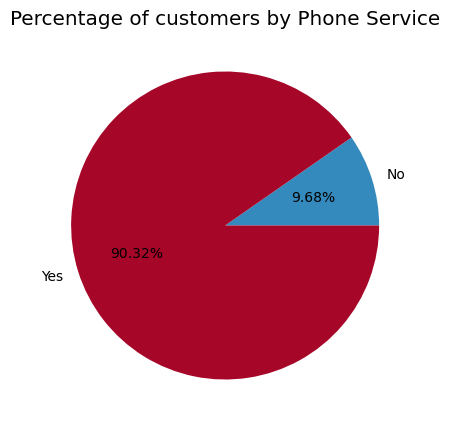

In [29]:
# Total number of customers by phone service

plt.style.use('bmh')
fig, ax = plt.subplots(figsize = (8,5))
plt.title('Percentage of customers by Phone Service')
count = Counter(df['PhoneService'])
ax.pie(count.values(), labels = count.keys(), autopct = lambda p: f'{p:.2f}%');

#### Observation 

The Phone Service pie service shows that 90% of Connecttel have active phone service 

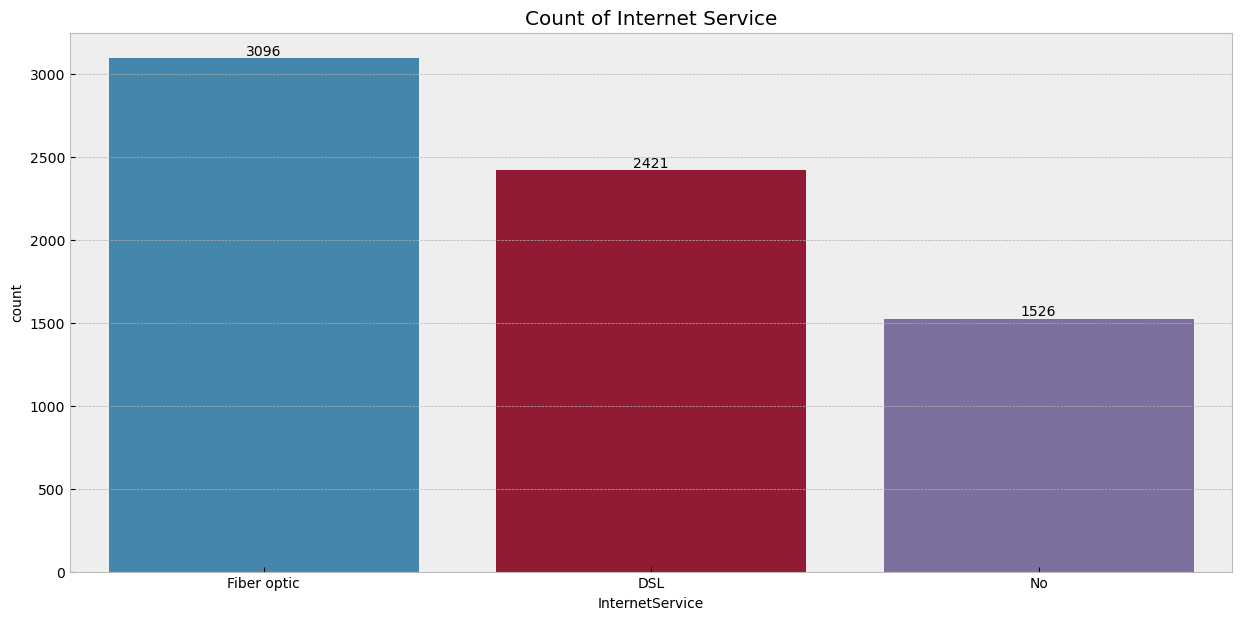

In [30]:
# Total number of internet service provided 

fig, ax = plt.subplots(figsize = (15,7))
plt.title('Count of Internet Service')
sb.countplot(x = 'InternetService', data = df, order = df['InternetService'].value_counts(ascending = False).index)
values = df['InternetService'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);

#### Connecttel 

The Countplot of Internet service provided shows that Fiber Option is the most popular option among Connecttel customers 

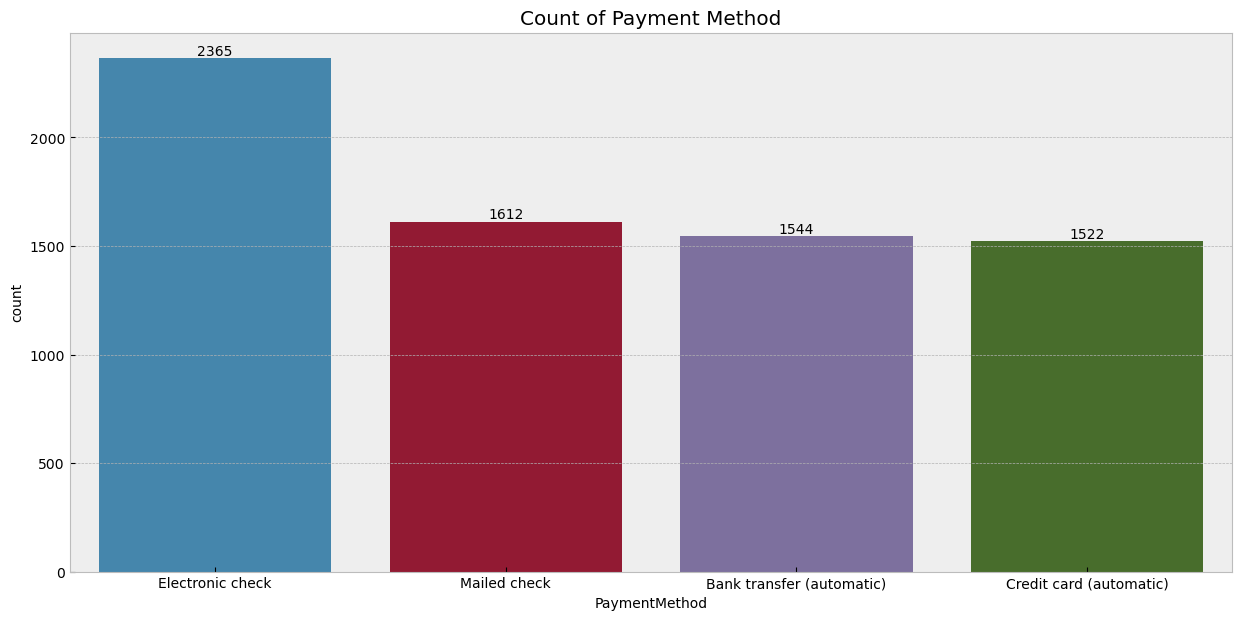

In [31]:
# Count of payment methods used by custormers 

fig, ax = plt.subplots(figsize = (15,7))
plt.title('Count of Payment Method')
sb.countplot(x = 'PaymentMethod', data = df, order = df['PaymentMethod'].value_counts(ascending = False).index)
values = df['PaymentMethod'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);

#### Connecttel 

The Countplot of Payment Method used shows that Electronic Check is the most popular option among Connecttel customers

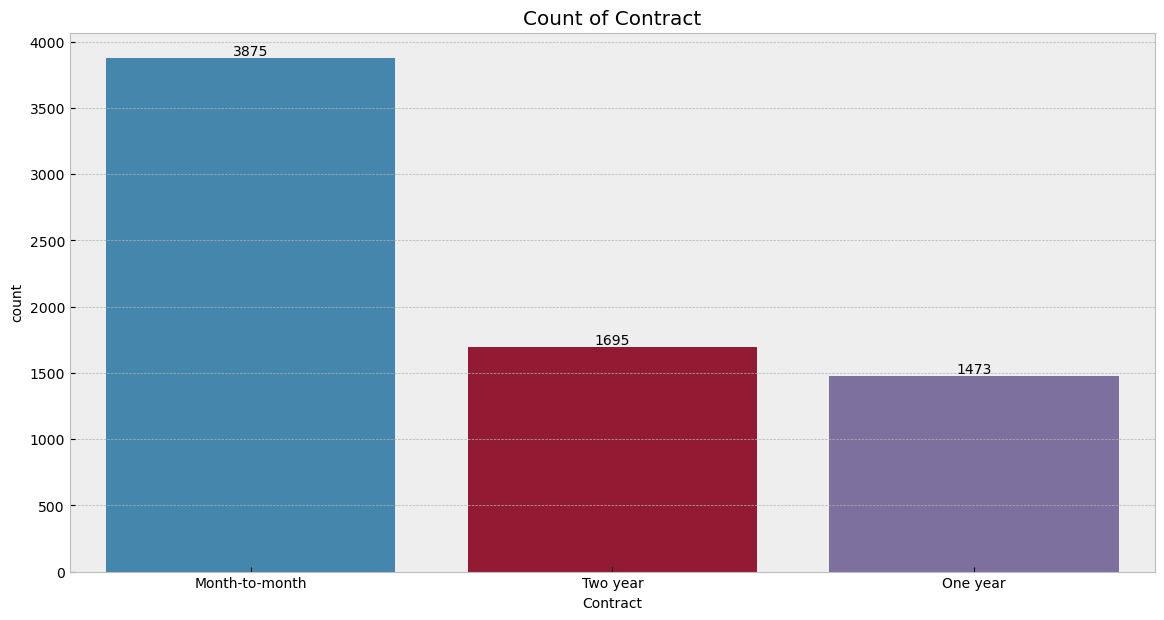

In [32]:
# Count of contracts

fig, ax = plt.subplots(figsize = (14,7))
plt.title('Count of Contract')
sb.countplot(x = 'Contract', data = df, order = df['Contract'].value_counts(ascending = False).index)
values = df['Contract'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);

#### Connecttel

The chart above shows month-to-month as the most popular type of contract amongst Connecttel customers

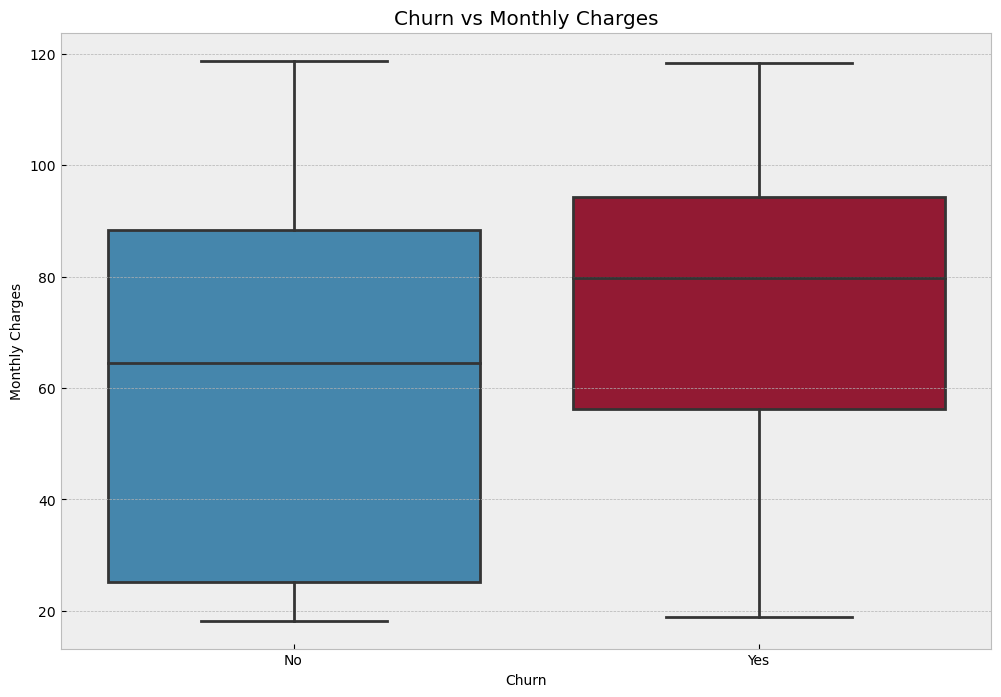

In [33]:
plt.figure(figsize=(12, 8))
sb.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


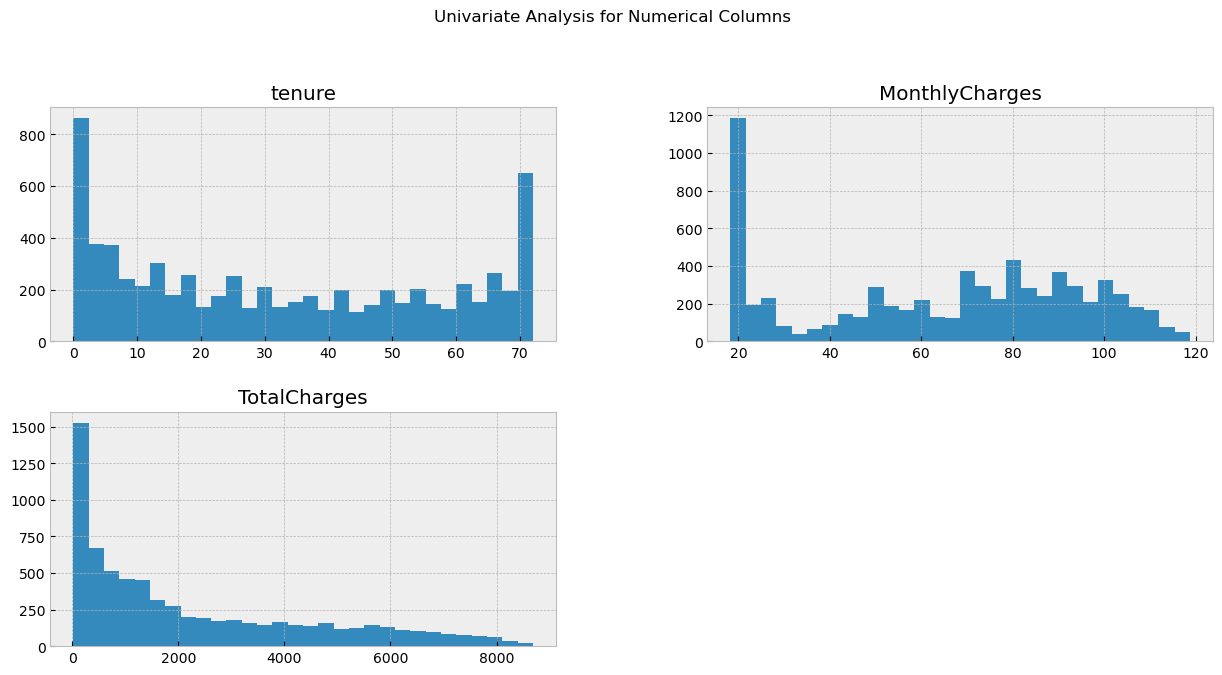

In [34]:
# Univariate analysis for numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].hist(bins=30, figsize=(15, 7))
plt.suptitle('Univariate Analysis for Numerical Columns', y=1.02)
plt.show()

#### Observation 

The charts above shows univariate analysis of Tenure, Monthly Charges and Total Charges 

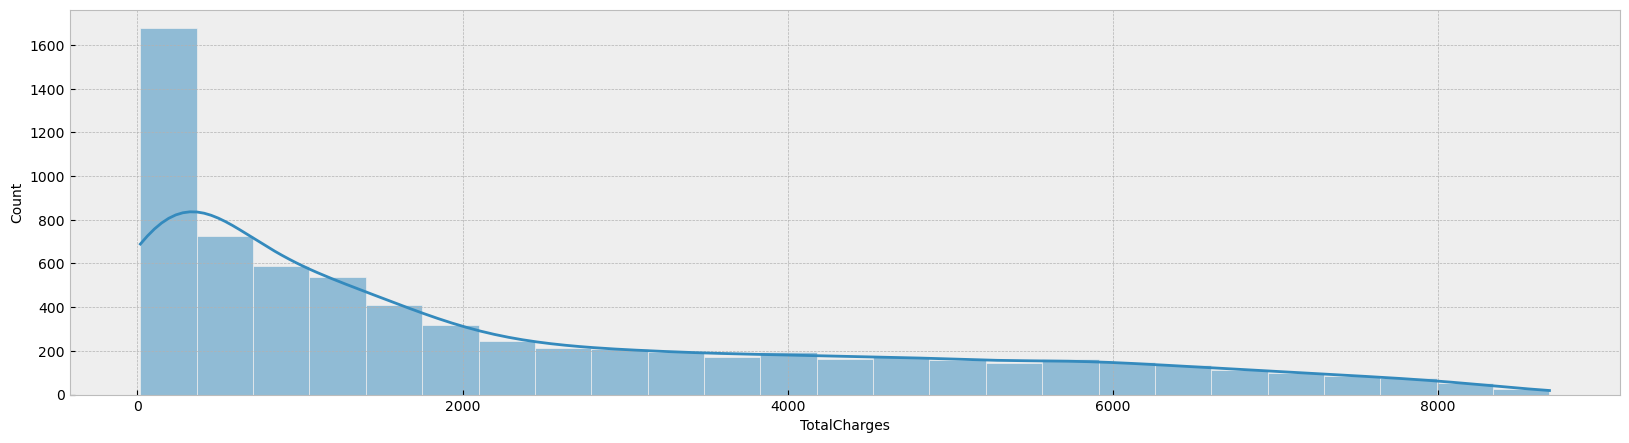

In [35]:
# Univariate of Total Charges)

plt.figure(figsize=(20,5))
plt.style.use('bmh')
sb.histplot(df['TotalCharges'],kde=True);

#### Observation 

The histogram above is positively skewed indicating a lower charge for most of the total charges 

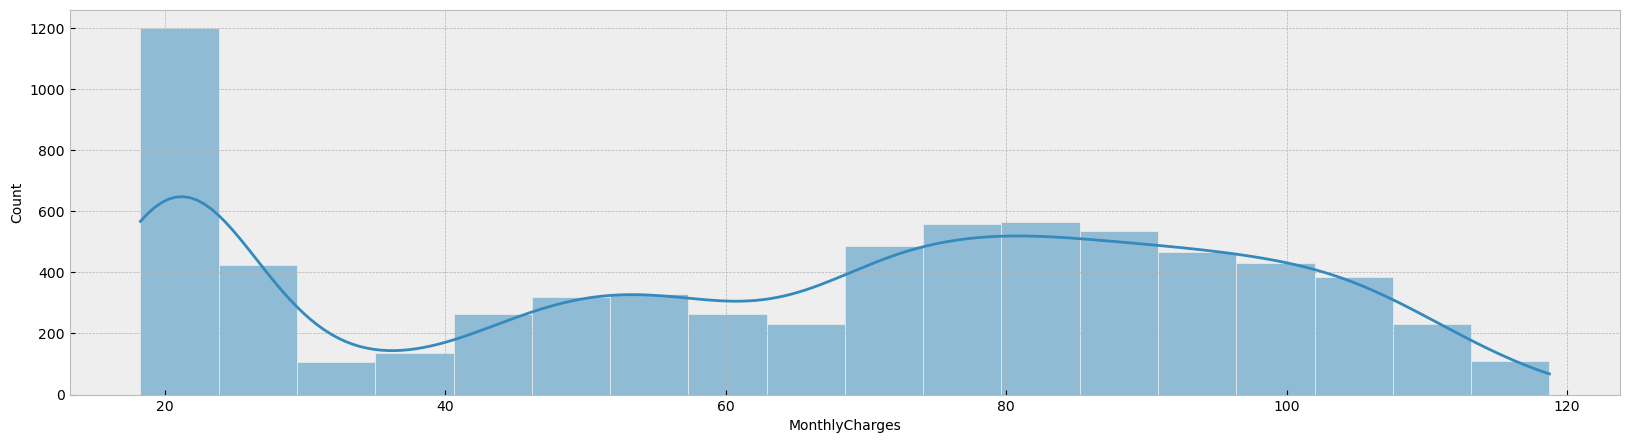

In [36]:
# Univariate of Monthly Charges)

plt.figure(figsize=(20,5))
plt.style.use('bmh')
sb.histplot(df['MonthlyCharges'],kde=True);

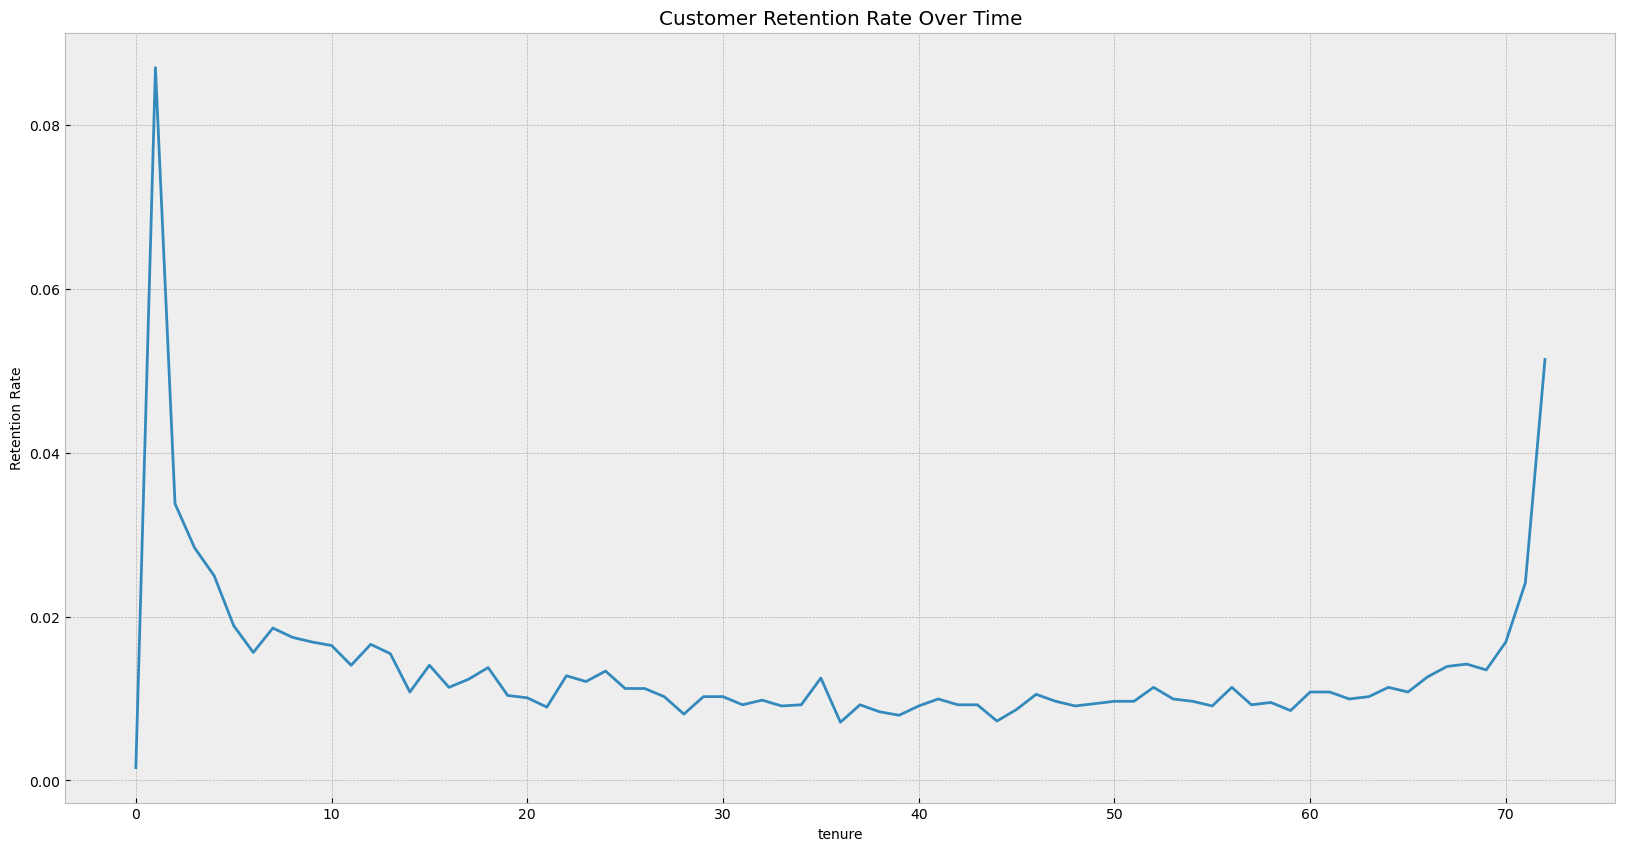

In [37]:
# Calculate customer retention rate
retention_rate = df.groupby('tenure')['customerID'].nunique() / df['customerID'].nunique()

# Visualize customer retention rate over time
plt.figure(figsize = (20,10))
plt.plot(retention_rate.index, retention_rate.values)
plt.title('Customer Retention Rate Over Time')
plt.xlabel('tenure')
plt.ylabel('Retention Rate')
plt.show()


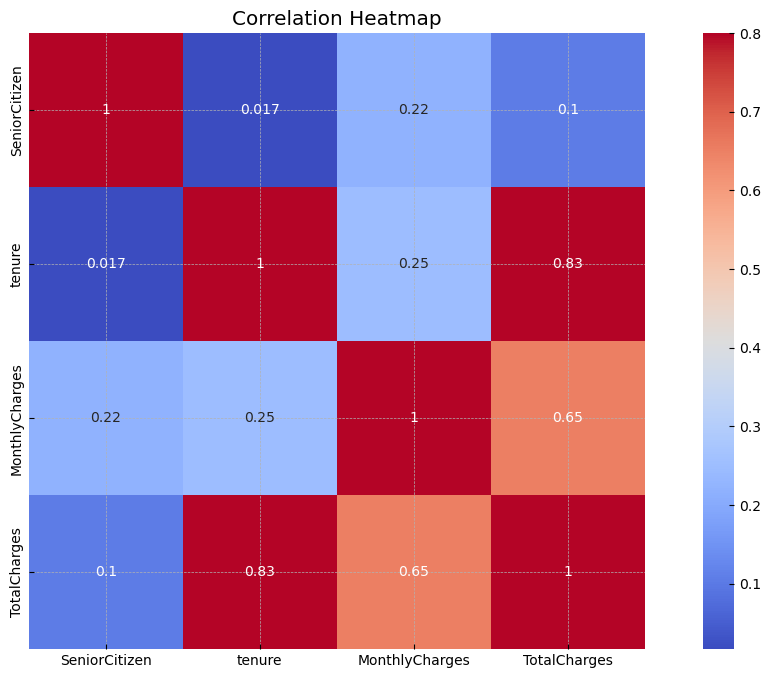

In [38]:
# Explore correlations among numerical features

a = df.corr()
f, ax = plt.subplots(figsize = (15,8))
sb.heatmap(a, vmax = .8, square = True, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Observation 

From the correlation heatmap we see a strong relationship between the tenure and total charges 

In [39]:
# Numerical features correlated with Monthly charges

corr_feat = num_feat.corr()['MonthlyCharges']
corr_feat

SeniorCitizen     0.220173
tenure            0.247900
MonthlyCharges    1.000000
TotalCharges      0.651065
Name: MonthlyCharges, dtype: float64

In [40]:
# Numerical features correlated with Total charges

corr_feat = num_feat.corr()['TotalCharges']
corr_feat

SeniorCitizen     0.102411
tenure            0.825880
MonthlyCharges    0.651065
TotalCharges      1.000000
Name: TotalCharges, dtype: float64

### Data Preprocessing 

In [41]:
df.isna().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
loyalty_group        0
dtype: int64

In [42]:
# Displaying the exact missing values in the dataset

df[df.isnull().any(axis = 1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,loyalty_group
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,NewCust: 0-12 mth
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,NewCust: 0-12 mth
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,NewCust: 0-12 mth
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,NewCust: 0-12 mth
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,NewCust: 0-12 mth
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,NewCust: 0-12 mth
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,NewCust: 0-12 mth
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,NewCust: 0-12 mth
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,NewCust: 0-12 mth
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,NewCust: 0-12 mth


In [43]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

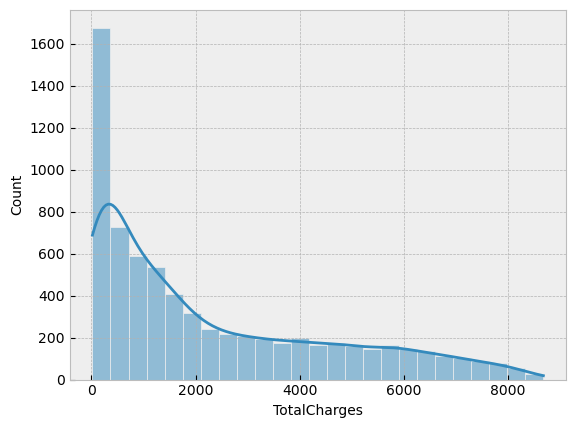

In [44]:
sb.histplot(df['TotalCharges'], kde = True);

In [45]:
# Using the simple imputer tool fill in all missing numerical data point 

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
num_feat = pd.DataFrame(imputer.fit_transform(num_feat), columns = num_feat.columns)

In [46]:
num_feat.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

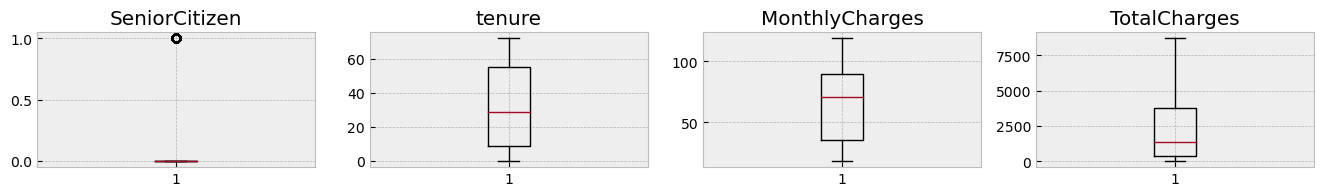

In [47]:
#outlier detection and plotting

plt.figure(figsize=(20,12))
for x,v in enumerate(num_feat):
    plt.subplot(7,6, x + 1)
    plt.boxplot(num_feat[v],whis=1.5)
    plt.tight_layout()
    plt.title(v)
plt.show();

In [48]:
# Combining numerical and categorical features using pd.concat

new_data = pd.concat([cat_feat, num_feat], axis=1)
new_data.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,loyalty_group,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,No,NewCust: 0-12 mth,0.0,1.0,29.85,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,No,MidTermCust: 25-48 mth,0.0,34.0,56.95,1889.50
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,Yes,NewCust: 0-12 mth,0.0,2.0,53.85,108.15
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),No,MidTermCust: 25-48 mth,0.0,45.0,42.30,1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,Yes,NewCust: 0-12 mth,0.0,2.0,70.70,151.65


In [49]:
new_data.isna().sum()

customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
loyalty_group       0
SeniorCitizen       0
tenure              0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [50]:
# Convert 'Yes'/'No' in 'Churn' to 1/0

new_data['Churn'] = new_data['Churn'].replace({'Yes': 1, 'No': 0})

# Display the DataFrame to verify the changes
new_data.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,loyalty_group,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,0,NewCust: 0-12 mth,0.0,1.0,29.85,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,0,MidTermCust: 25-48 mth,0.0,34.0,56.95,1889.50
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,1,NewCust: 0-12 mth,0.0,2.0,53.85,108.15
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),0,MidTermCust: 25-48 mth,0.0,45.0,42.30,1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,1,NewCust: 0-12 mth,0.0,2.0,70.70,151.65


In [51]:
# Creating a copy of the dataset 

nd2 = new_data.copy() 

In [52]:
nd2.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,loyalty_group,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,0,NewCust: 0-12 mth,0.0,1.0,29.85,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,0,MidTermCust: 25-48 mth,0.0,34.0,56.95,1889.50
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,1,NewCust: 0-12 mth,0.0,2.0,53.85,108.15
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),0,MidTermCust: 25-48 mth,0.0,45.0,42.30,1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,1,NewCust: 0-12 mth,0.0,2.0,70.70,151.65


In [53]:
# Dropping neccessary columns 

columns_to_drop = ['customerID', 'loyalty_group']
nd2 = nd2.drop(columns_to_drop, axis=1)

nd2.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,0.0,1.0,29.85,29.85
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,0.0,34.0,56.95,1889.50
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1,0.0,2.0,53.85,108.15
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,0.0,45.0,42.30,1840.75
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1,0.0,2.0,70.70,151.65


In [54]:
# Encoding the features 
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()

for i in nd2.columns[0:]:
    if(nd2[i].dtype== 'object'):
        nd2[i]= encoder.fit_transform(nd2[i])
    else:
        nd2[i]=nd2[i]

nd2.head() 

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0.0,1.0,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.0,34.0,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0.0,2.0,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.0,45.0,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0.0,2.0,70.70,151.65


In [55]:
# Segmenting data into features and target label 

x = nd2.drop('Churn', axis = 1)
target = nd2['Churn']

In [56]:
x.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0.0,1.0,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0.0,34.0,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0.0,2.0,53.85,108.15


In [57]:
target.head(3)

0    0
1    0
2    1
Name: Churn, dtype: int64

In [58]:
# Feature scaling 

# import neccesary library
from sklearn.preprocessing import MinMaxScaler 

# Instanstiate scaler 
scaler  = MinMaxScaler()

# Scaled 
scaled_data = scaler.fit_transform(x)
# scaled_data

In [59]:
# Split dataset into training and validation set 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_data, target, test_size = 0.2, random_state = 42)

In [60]:
nd2.shape

(7043, 20)

In [61]:
target.shape

(7043,)

In [62]:
x_train.shape

(5634, 19)

In [63]:
x_test.shape

(1409, 19)

In [64]:
nd2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   PhoneService      7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   InternetService   7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   OnlineBackup      7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  Churn             7043 non-null   int64  
 16  SeniorCitizen     7043 non-null   float64


### Building a Base Model

In [65]:
from sklearn.linear_model import LinearRegression #ols
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 

# classifier libraries - ml algorithms 
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier 


# !pip install xgboost
from xgboost import XGBClassifier 
from sklearn.svm import LinearSVC, SVC
from sklearn.svm import SVC 

# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [66]:
# Model Building 

# Random Forest Classifier  
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

rfy_pred = rfc.predict(x_test)

print("Random Forest Classifier")
print("Accuracy: ", accuracy_score(y_test, rfy_pred))
print("Precision: ", precision_score(y_test, rfy_pred))
print("Recall: ", recall_score(y_test, rfy_pred))
print("F1-score: ", f1_score(y_test, rfy_pred))
print("AUC-ROC: ", roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy:  0.7970191625266146
Precision:  0.6629213483146067
Recall:  0.4745308310991957
F1-score:  0.553125
AUC-ROC:  0.6938291221133044


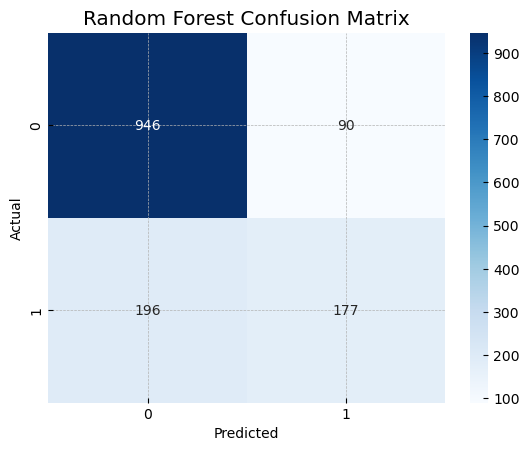

In [67]:
# Create a confusion matrix 
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion 
sb.heatmap(rcm, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

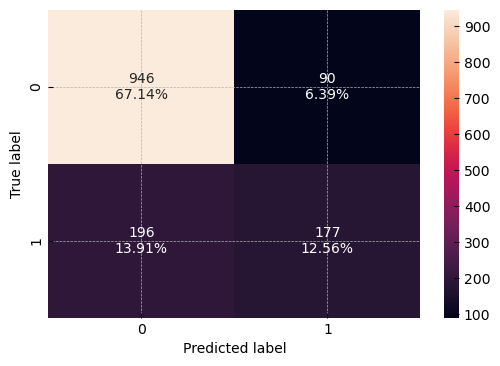

In [70]:
confusion_matrix_sklearn(rfc, x_test, y_test)

#### Observation 

From the Random Forest confusion matrix the model has 14% false negatives

In [71]:
# Logistic Regression
lr = LogisticRegression()

lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

print("Logistic Regression")
print("Accuracy: ", accuracy_score(y_test, lr_pred))
print("Precision: ", precision_score(y_test, lr_pred))
print("Recall: ", recall_score(y_test, lr_pred))
print("F1-score: ", f1_score(y_test, lr_pred))
print("AUC-ROC: ", roc_auc_score(y_test, lr_pred))

Logistic Regression
Accuracy:  0.8161816891412349
Precision:  0.6792452830188679
Recall:  0.579088471849866
F1-score:  0.6251808972503617
AUC-ROC:  0.7403164366971338


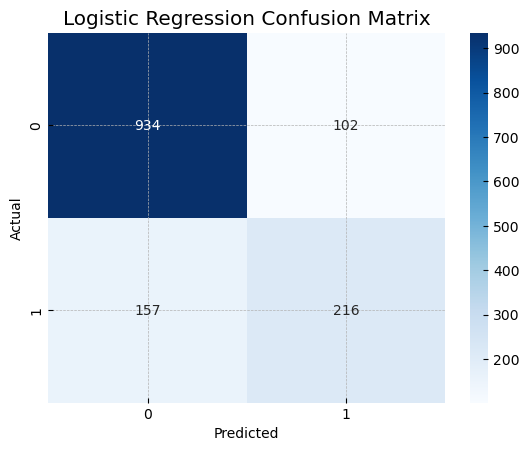

In [72]:
# Create a confusion matrix 
lcm = confusion_matrix(y_test, lr_pred)

# Visualize the confusion 
sb.heatmap(lcm, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

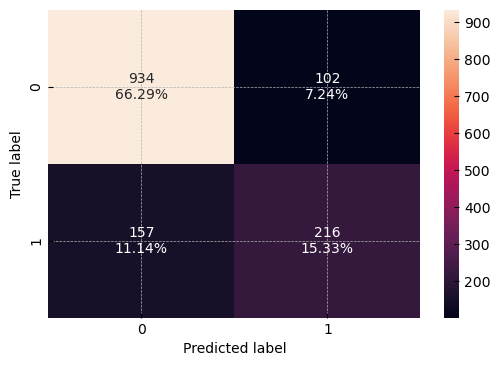

In [73]:
confusion_matrix_sklearn(lr, x_test, y_test)

#### Observation 

From the Logistic Regression confusion matrix the model has 11% false negatives

In [74]:
# Naive Bayes 
gn = GaussianNB()

gn.fit(x_train, y_train)

gn_pred = gn.predict(x_test)

print("Naive Bayes ")
print("Accuracy: ", accuracy_score(y_test, gn_pred))
print("Precision: ", precision_score(y_test, gn_pred))
print("Recall: ", recall_score(y_test, gn_pred))
print("F1-score: ", f1_score(y_test, gn_pred))
print("AUC-ROC: ", roc_auc_score(y_test, gn_pred))

Naive Bayes 
Accuracy:  0.7579843860894251
Precision:  0.5293040293040293
Recall:  0.774798927613941
F1-score:  0.6289445048966268
AUC-ROC:  0.7633647147722213


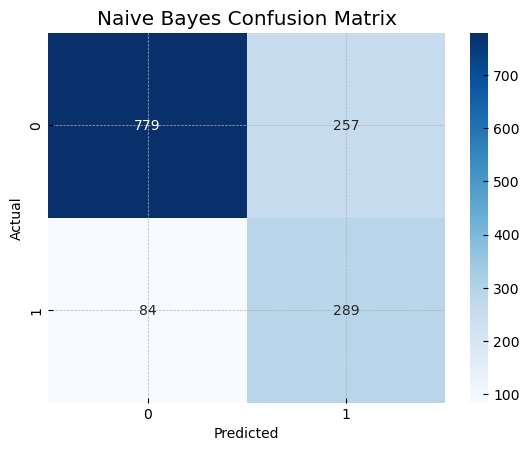

In [75]:
# Create a confusion matrix 
gcm = confusion_matrix(y_test, gn_pred)

# Visualize the confusion 
sb.heatmap(gcm, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

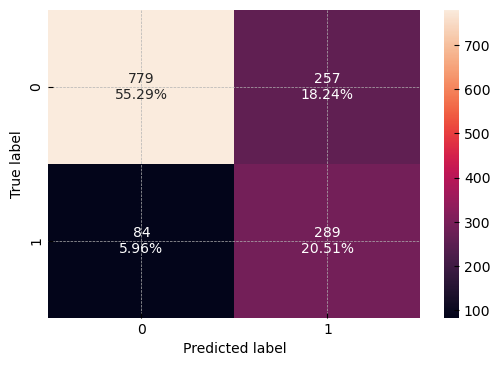

In [76]:
confusion_matrix_sklearn(gn, x_test, y_test)

#### Observation
From the Naive Bayes confusion matrix the model has 6% false negatives

In [77]:
#instantiate regressor models

lr_mod = LogisticRegression()
ln_mod = LinearRegression()
r_mod = Ridge()
dc_tree = DecisionTreeRegressor()
gb_mod = GradientBoostingRegressor()
gnb_mod = GaussianNB()
rf_mod = RandomForestClassifier()
dt_mod = DecisionTreeClassifier()

In [78]:
#fitting models on training data

lr_mod.fit(x_train,y_train)
ln_mod.fit(x_train,y_train)
r_mod.fit(x_train,y_train)
dc_tree.fit(x_train,y_train)
gb_mod.fit(x_train,y_train)
gnb_mod.fit(x_train, y_train)
rf_mod.fit(x_train, y_train)
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier()

In [79]:
# Creating predictions

r_pred = r_mod.predict(x_test)
pred_dc = dc_tree.predict(x_test)
pred_lr = lr_mod.predict(x_test)
pred_ln = ln_mod.predict(x_test)
pred_gb = gb_mod.predict(x_test)
pred_rf = rf_mod.predict(x_test)
pred_dt = dt_mod.predict(x_test)
pred_gnb = gnb_mod.predict(x_test)

### Base Model Evaluation

In [80]:
lr_score = lr_mod.score(x_test, y_test)
ln_score = ln_mod.score(x_test, y_test)
gb_score = gb_mod.score(x_test, y_test)
rf_score = rf_mod.score(x_test, y_test)
dt_score = dt_mod.score(x_test, y_test)
r_score = r_mod.score(x_test, y_test)
gnb_score = gnb_mod.score(x_test, y_test)
dc_score = dc_tree.score(x_test, y_test)

print(f"Model accuracy score for Logistic Regression is: {lr_score}")
print(f"Model accuracy score for Linear Regression is: {ln_score}")
print(f"Model accuracy score for Gradient Boosting Regressor is: {gb_score}")
print(f"Model accuracy score for Random Forest Classifier is: {rf_score}")
print(f"Model accuracy score for Decision Tree Classifier is: {dt_score}")
print(f"Model accuracy score for Ridge is: {r_score}")
print(f"Model accuracy score for Decision Tree Regressor is: {dc_score}")
print(f"Model accuracy score for Naive Bayes is: {gnb_score}")

Model accuracy score for Logistic Regression is: 0.8161816891412349
Model accuracy score for Linear Regression is: 0.30296522678894977
Model accuracy score for Gradient Boosting Regressor is: 0.33689563995878546
Model accuracy score for Random Forest Classifier is: 0.8026969481902059
Model accuracy score for Decision Tree Classifier is: 0.7288857345635202
Model accuracy score for Ridge is: 0.3027396558433072
Model accuracy score for Decision Tree Regressor is: -0.36317840724677164
Model accuracy score for Naive Bayes is: 0.7579843860894251


In [81]:
# Model evaluation using metrics

from sklearn.metrics import classification_report, confusion_matrix

In [82]:
# Classification report for Random Forest Classifier 

print(f"Model accuracy score for RandomForestClassifier is: {rf_score}")
print("Random Forest Classifier Model Report: \n", classification_report(y_test, pred_rf))

Model accuracy score for RandomForestClassifier is: 0.8026969481902059
Random Forest Classifier Model Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [83]:
# helpful function to plot out a confusion matrix

def confusion_matrix_sklearn (model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    
    model: classifier 
    predictors: independent variables 
    target: dependent variable 
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())] 
             for item in cm.flatten()
        ]
    ).reshape(2,2)
    
    plt.figure(figsize = (6, 4))
    sb.heatmap(cm, annot = labels, fmt = "")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

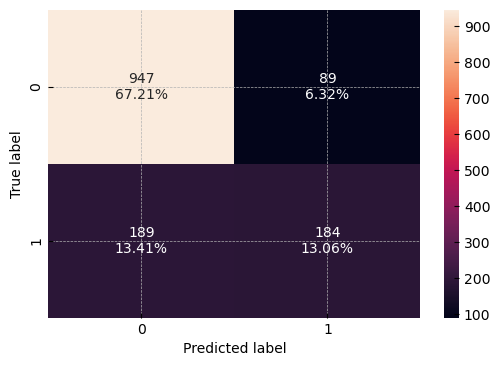

In [84]:
confusion_matrix_sklearn(rf_mod, x_test, y_test)

In [85]:
# Classification report for Decision Tree Classifier 

print(f"Model accuracy score for Decision Tree Classifier is: {dt_score}")
print("Decision Tree Classifier Model Report: \n", classification_report(y_test, pred_dt))

Model accuracy score for Decision Tree Classifier is: 0.7288857345635202
Decision Tree Classifier Model Report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.49      0.50      0.50       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



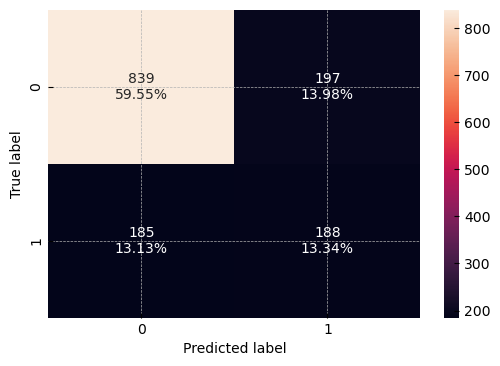

In [86]:
confusion_matrix_sklearn(dt_mod, x_test, y_test)

In [87]:
# Classification report for Logistic Regression 

print(f"Model accuracy score for Logistic Regression is: {lr_score}")
print("Logistic Regression Model Report: \n", classification_report(y_test, pred_lr))

Model accuracy score for Logistic Regression is: 0.8161816891412349
Logistic Regression Model Report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



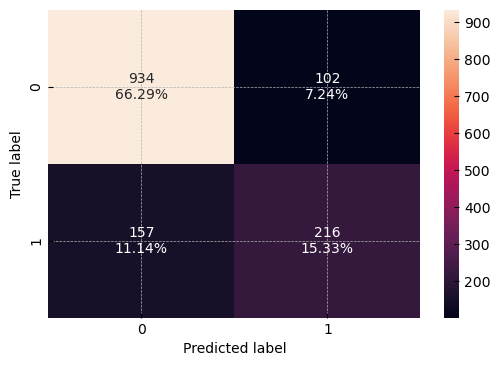

In [88]:
confusion_matrix_sklearn(lr_mod, x_test, y_test)

In [89]:
# Classification report for Naive Bayes  

print(f"Model accuracy score for Logistic Regression is: {gnb_score}")
print("Logistic Regression Model Report: \n", classification_report(y_test, pred_gnb))

Model accuracy score for Logistic Regression is: 0.7579843860894251
Logistic Regression Model Report: 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



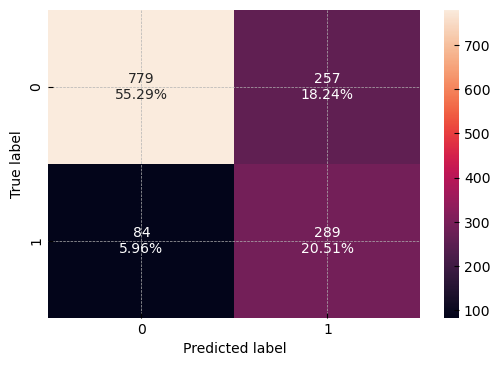

In [90]:
confusion_matrix_sklearn(gnb_mod, x_test, y_test)

In [91]:
#8 Machine learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'], 
               [RandomForestClassifier(), 'Random Forest'], 
               [KNeighborsClassifier(), 'K-Nearest Neighbours'], 
               [SGDClassifier(), 'SGD classifier'], 
               [SVC(), 'SVC'], 
               [GaussianNB(), "Naive Bayes"], 
               [DecisionTreeClassifier(random_state = 42), "Decision Tree"], 
               [LogisticRegression(), 'Logistic Regression']
              ]

In [92]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassi

In [93]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}


for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)

    a_score = accuracy_score(y_test, pred)
    P_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(P_score*100, 2)) + '%']) 
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
 
    if model_name != classifiers[-1][1]:
        print('')

In [94]:
acc_list

{'XGB Classifier': ['79.77%'],
 'Random Forest': ['79.63%'],
 'K-Nearest Neighbours': ['76.44%'],
 'SGD classifier': ['80.27%'],
 'SVC': ['80.7%'],
 'Naive Bayes': ['75.8%'],
 'Decision Tree': ['73.46%'],
 'Logistic Regression': ['81.62%']}

In [95]:
# convert the above into a table 

print("Accuracy Score")
sl = pd.DataFrame(acc_list)
sl.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,79.77%,79.63%,76.44%,80.27%,80.7%,75.8%,73.46%,81.62%


In [96]:
precision_list

{'XGB Classifier': ['64.47%'],
 'Random Forest': ['65.81%'],
 'K-Nearest Neighbours': ['56.12%'],
 'SGD classifier': ['61.61%'],
 'SVC': ['68.77%'],
 'Naive Bayes': ['52.93%'],
 'Decision Tree': ['49.87%'],
 'Logistic Regression': ['67.92%']}

In [97]:
print("Precision List")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision List


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,64.47%,65.81%,56.12%,61.61%,68.77%,52.93%,49.87%,67.92%


In [98]:
print("Recall")
s2 = pd.DataFrame(recall_list)
s2.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,52.55%,47.99%,50.4%,67.56%,49.6%,77.48%,50.94%,57.91%


In [99]:
print("Roc Score")
s5 = pd.DataFrame(roc_list)
s5.head()

Roc Score


""


#### Note

To make our model perform better we are going to use three different approach to handle the imbalance observed in the Churn

### Handling the imbalance dataset - Churn

In [100]:
# Class Count 
count_class_0, count_class_1 = nd2.Churn.value_counts()

# Divide by class
nd_class_0 = nd2[nd2['Churn'] == 0]
nd_class_1 = nd2[nd2['Churn'] == 1]

In [101]:
count_class_0, count_class_1

(5174, 1869)

In [102]:
nd_class_0.shape 

(5174, 20)

In [103]:
nd_class_1.shape

(1869, 20)

In [104]:
nd_class_0.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [105]:
nd_class_1.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

#### Method 1 - Under Sampling

 .sample() function created random sample of whatever number is specified 

In [106]:
nd_class_0_under = nd_class_0.sample(count_class_1)

nd_test_under = pd.concat([nd_class_0_under, nd_class_1], axis=0)

print('Random under-sampling:')
print(nd_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [107]:
x1 = nd_test_under.drop('Churn', axis='columns')
y = nd_test_under['Churn']

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=15, stratify=y)
# stratify argument makes sure we have balanced samples

In [108]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [109]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}


for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)

    a_score = accuracy_score(y_test, pred)
    P_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(P_score*100, 2)) + '%']) 
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
 
    if model_name != classifiers[-1][1]:
        print('')

In [110]:
acc_list

{'XGB Classifier': ['72.99%'],
 'Random Forest': ['75.27%'],
 'K-Nearest Neighbours': ['69.12%'],
 'SGD classifier': ['59.89%'],
 'SVC': ['64.44%'],
 'Naive Bayes': ['74.87%'],
 'Decision Tree': ['69.92%'],
 'Logistic Regression': ['74.6%']}

In [111]:
precision_list

{'XGB Classifier': ['71.83%'],
 'Random Forest': ['74.17%'],
 'K-Nearest Neighbours': ['68.97%'],
 'SGD classifier': ['55.56%'],
 'SVC': ['66.77%'],
 'Naive Bayes': ['72.36%'],
 'Decision Tree': ['69.25%'],
 'Logistic Regression': ['72.01%']}

In [112]:
print("Recall")
s2 = pd.DataFrame(recall_list)
s2.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,75.67%,77.54%,69.52%,98.93%,57.49%,80.48%,71.66%,80.48%


#### Observation 

After the imbalance was under-sampled we can see an improvement in the Precision and Recall scores, Stochastic Gradient Descent(SGD) classifier had the highest recall score which is an important matrix in solving the Churn problem

#### Method 2 - Over Sampling

Over sampling the minority class

In [113]:
count_class_0, count_class_1

(5174, 1869)

In [114]:
nd_class_1.shape

(1869, 20)

In [115]:
nd_class_1.sample(count_class_0, replace=True).shape

(5174, 20)

In [116]:
nd_class_1_over = nd_class_1.sample(count_class_0, replace=True)

nd_test_over = pd.concat([nd_class_0, nd_class_1_over], axis=0)

print('Random under-sampling:')
print(nd_test_over.Churn.value_counts())

Random under-sampling:
0    5174
1    5174
Name: Churn, dtype: int64


In [117]:
x1 = nd_test_over.drop('Churn', axis='columns')
y = nd_test_over['Churn']

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=15, stratify=y)

In [118]:
y_train.value_counts()

1    4139
0    4139
Name: Churn, dtype: int64

In [119]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}


for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)

    a_score = accuracy_score(y_test, pred)
    P_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(P_score*100, 2)) + '%']) 
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
 
    if model_name != classifiers[-1][1]:
        print('')

In [120]:
precision_list

{'XGB Classifier': ['81.78%'],
 'Random Forest': ['86.32%'],
 'K-Nearest Neighbours': ['73.54%'],
 'SGD classifier': ['59.04%'],
 'SVC': ['68.42%'],
 'Naive Bayes': ['73.08%'],
 'Decision Tree': ['83.45%'],
 'Logistic Regression': ['73.67%']}

In [121]:
recall_list

{'XGB Classifier': ['91.5%'],
 'Random Forest': ['95.75%'],
 'K-Nearest Neighbours': ['83.77%'],
 'SGD classifier': ['92.75%'],
 'SVC': ['61.55%'],
 'Naive Bayes': ['81.06%'],
 'Decision Tree': ['94.98%'],
 'Logistic Regression': ['81.64%']}

In [122]:
acc_list

{'XGB Classifier': ['85.56%'],
 'Random Forest': ['90.29%'],
 'K-Nearest Neighbours': ['76.81%'],
 'SGD classifier': ['64.2%'],
 'SVC': ['66.57%'],
 'Naive Bayes': ['75.6%'],
 'Decision Tree': ['88.07%'],
 'Logistic Regression': ['76.23%']}

#### Observation 

After the imbalance was over-sampled we can see an even better improvement in the Precision and Recall scores, Random Forest classifier had the highest Accuracy, Precision and Recall score

### Method 3 - SMOTE

Synthetic minority over sampling technique, uses knearestneighbours algarithm to try to create synthetic samples -  it uses imblearn to do this 

In [123]:
x = nd2.drop('Churn', axis = 1)
target = nd2['Churn']

In [124]:
target.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [125]:
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE(sampling_strategy='minority')

# Fit and transform the data
x_sm, target_sm = smote.fit_resample(x, target)

# Check the value counts of the target variable after SMOTE
target_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, target_sm, test_size=0.2, random_state=15, stratify=target_sm)

In [127]:
y_train.value_counts()

1    4139
0    4139
Name: Churn, dtype: int64

In [128]:
y_test.value_counts()

1    1035
0    1035
Name: Churn, dtype: int64

In [129]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}


for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)

    a_score = accuracy_score(y_test, pred)
    P_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(P_score*100, 2)) + '%']) 
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
 
    if model_name != classifiers[-1][1]:
        print('')

In [130]:
precision_list

{'XGB Classifier': ['83.1%'],
 'Random Forest': ['85.52%'],
 'K-Nearest Neighbours': ['74.42%'],
 'SGD classifier': ['54.17%'],
 'SVC': ['67.67%'],
 'Naive Bayes': ['75.52%'],
 'Decision Tree': ['78.44%'],
 'Logistic Regression': ['78.25%']}

In [131]:
recall_list

{'XGB Classifier': ['85.02%'],
 'Random Forest': ['85.6%'],
 'K-Nearest Neighbours': ['83.77%'],
 'SGD classifier': ['99.13%'],
 'SVC': ['60.68%'],
 'Naive Bayes': ['80.48%'],
 'Decision Tree': ['79.42%'],
 'Logistic Regression': ['82.03%']}

In [132]:
acc_list

{'XGB Classifier': ['83.86%'],
 'Random Forest': ['85.56%'],
 'K-Nearest Neighbours': ['77.49%'],
 'SGD classifier': ['57.63%'],
 'SVC': ['65.85%'],
 'Naive Bayes': ['77.2%'],
 'Decision Tree': ['78.79%'],
 'Logistic Regression': ['79.61%']}

#### Observation 

After the imbalance was addressed with SMOTE technique we can see an improvement in the Precision and Recall scores, Random Forest classifier had the highest Accuracy, Precision and Recall score. 

## Conclusion

In this churn analysis, our objective was to predict customer churn effectively using machine learning techniques. We utilized a dataset with an initial imbalance in churn classes, where approximately 27% of customers were identified as churning. The challenge of imbalanced data was acknowledged as it could introduce bias and affect model performance.

To address this imbalance, we employed the Over-sampling Technique to create a more balanced dataset. This technique allowed us to generate more samples for the minority class, ensuring a more equitable representation of churn and non-churn instances.

We evaluated the performance of several machine learning models both before and after addressing the imbalance. Initially, Naive Bayes appeared to perform best; however, this was attributed to the influence of imbalanced data. Upon reevaluation, the Random Forest model emerged as the most effective in predicting churn, demonstrating superior accuracy, precision, recall, F1-score, and AUC-ROC.

Random Forest, a robust ensemble learning method, showcased its ability to handle imbalanced data and capture intricate relationships within the dataset. It provided crucial insights into the key factors influencing churn, highlighting areas for targeted interventions. Factors such as contract duration, monthly charges, and usage of online security and backup services were identified as significant predictors of churn.

Based on these insights, we recommend that the company focuses on personalized customer engagement strategies and service enhancements to retain customers. Offering incentives for longer contract durations and optimizing pricing strategies for specific customer segments could be effective approaches to mitigate churn.

For future work, it would be beneficial to explore more advanced machine learning models and conduct a deeper analysis of customer segments to tailor retention strategies further. Additionally, integrating real-time data and monitoring customer interactions may enhance predictive accuracy and provide timely insights for proactive churn prevention.

In conclusion, this analysis sheds light on the critical role of addressing imbalanced data in churn prediction. By employing the appropriate techniques and models, companies can derive valuable insights to inform decision-making and implement targeted strategies for customer retention.